# Forecasting

## Summary

| #   | Method                                                  |mean squared error  |mean absolute error| |
|:----|:--------------------------------------------------------|-------------------:|------------------:|--:|
| 01  | Pandas moving average - pre-grouped by month (3 month)  | 234418077.64       | 10567.14   |2292.11|
| 2A  | Pandas moving average - pre-grouped by day (3 day)      | 916611.0          | 645.75    |   1605.19|
| 2B  | Pandas moving average - pre-grouped by day post-grouped month (3 day)|75117338.43| 3303.46| 47352.58 |
| 03  | SARIMA - Monthly - (0, 1, 0) (0, 1, 0, 12)          | 1428109073.12      | 17107.39         |
| 04  | SARIMA - Daily - (0, 1, 1) (1, 1, 1, 7)  |1910370.29|775.0|
| 05  | Exponential Smoothing - Monthly   |         |            |
| 06  | Exponential Smoothing - Daily   |         |            |

## References

* https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
* https://www.kaggle.com/code/carlmcbrideellis/time-series-a-simple-moving-average-ma-model
* https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c
* https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/
* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
* https://stackoverflow.com/questions/46146537/error-in-threading-sarimax-model


## Loading Libraries and datasets

In [1]:
# Importing data analytics libraries
import pandas as pd
import numpy as np

In [2]:
# Importing visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Setting parameters for plot fig size
plt.rcParams["figure.figsize"] = (20,16)

In [3]:
# Importing performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
# statsmodels libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
# Pyramid arima for autoarima
import pmdarima as pm

In [6]:
# Reading the cleaned and feature-engineered test dataset
df_test = pd.read_csv('../competitive-data-science-final-project/sales_test_with_target.csv')

In [7]:
# Reading the cleaned and feature-engineered train dataset
df = pd.read_csv('../competitive-data-science-final-project/new_sales_train.csv')

## Grouping the dataframes to get one row each for the measured time unit

In [8]:
# Grouping by date_block_num to get monthly item_cnt_day sum
df_monthly = df.groupby(df.date_block_num)[["item_cnt_day"]].sum()
df_monthly.tail()

,item_cnt_day
date_block_num,
28,72295.0
29,64114.0
30,63187.0
31,66079.0
32,72843.0


In [9]:
# Grouping the test data - Monthly
df_monthly_test = df_test.groupby(df_test.date_block_num)[["item_cnt_day"]].sum()

In [10]:
# Grouping by date to get daily item_cnt_day sum
df_daily = df.groupby(df.date)[["item_cnt_day"]].sum()

In [11]:
# Grouping the test data - Daily
df_daily_test = df_test.groupby(df_test.date)[["item_cnt_day"]].sum()

# 1. Pandas moving average - grouped by month - 3 month

In [12]:
# Making a copy of the data frame
df_monthly_train = df_monthly.copy()

In [13]:
# Adding rolling average column for 3 month rolling average
df_monthly_train["rolling_av3"] = df_monthly_train["item_cnt_day"].rolling(3).mean().round(2)

In [14]:
# Adding the rolling average of month 32 as the actual for month 33 to predict the average for month 33 
df_monthly_train.loc[len(df_monthly_train)] = [df_monthly_train.rolling_av3[32], " "]

In [15]:
# Predicting the rolling average for month 33 in a seperate column
df_monthly_train["rolling_av3_1"] = df_monthly_train["item_cnt_day"].rolling(3).mean().round(2)

In [16]:
# Replacing the item_cnt_day value for month 33 with test data and calculating the MSE and MAE
actual_val = float(df_monthly_test.item_cnt_day.iloc[0])
df_monthly_train.at[33,"item_cnt_day"] = actual_val

In [17]:
#mean squared error (y_true, y_pred)
mean_squared_error(df_monthly_train.item_cnt_day[2:], df_monthly_train.rolling_av3_1[2:]).round(2)

234418077.64

In [18]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(df_monthly_train.item_cnt_day[2:], df_monthly_train.rolling_av3_1[2:]).round(2)

10567.14

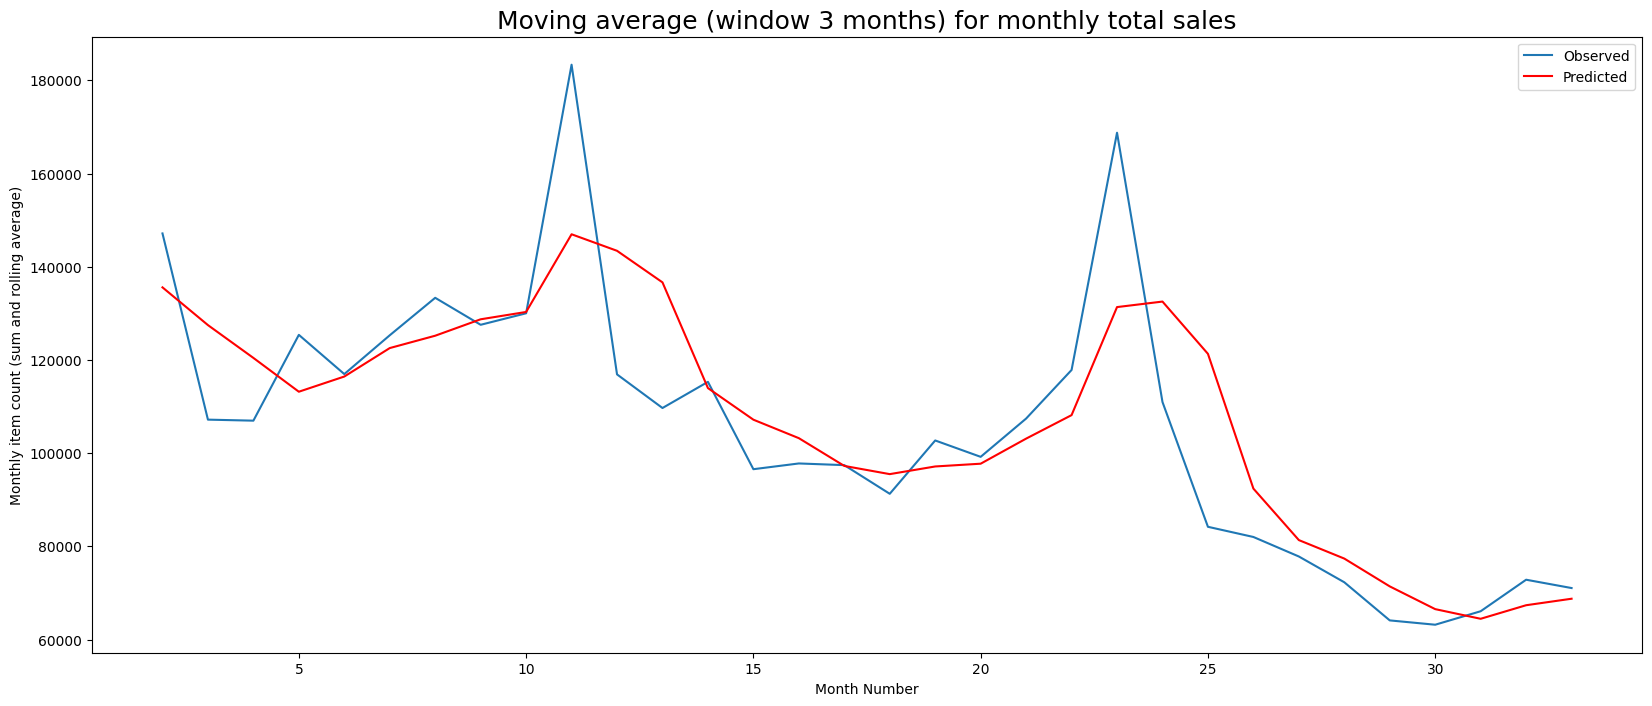

In [19]:
#Setting parameters for plot fig size
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(df_monthly_train.item_cnt_day[2:])
plt.plot(df_monthly_train.rolling_av3_1[2:], color='red')
plt.title("Moving average (window 3 months) for monthly total sales",
         fontsize = 18)
plt.xlabel("Month Number")
plt.ylabel("Monthly item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

In [20]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(df_monthly_train.item_cnt_day[-1:], df_monthly_train.rolling_av3_1[-1:]).round(2)

2292.11

# 2A. Pandas moving average - daily - 3 day

In [21]:
# Making a copy of the data frame
df_daily_train = df_daily.copy()

In [22]:
# Adding rolling average column for 3 day rolling average
df_daily_train["rolling_av3"] = df_daily_train["item_cnt_day"].rolling(3).mean().round(2)

In [23]:
length = len(df_daily_train)
length

1003

In [24]:
d = 1002
i = 0
while (d < 1033):
    df_daily_train["rolling_av3"] = df_daily_train["item_cnt_day"].rolling(3).mean().round(2)
    #df.at[4, 'B']
    df_daily_train.at[df_daily_test.index[i], "item_cnt_day"] = df_daily_train.rolling_av3[len(df_daily_train) - 1]
    d = d + 1
    i = i + 1
    #len(df_daily_train)
    #
df_daily_train["rolling_av3"] = df_daily_train["item_cnt_day"].rolling(3).mean().round(2)
print('Rolling average calculated')
# replace test data range of item_cnt_day with actual values
i = 0
while (i < len(df_daily_test)):
    df_daily_train.item_cnt_day[length + i] = df_daily_test.item_cnt_day[i]
    i = i + 1
print("item_cnt_day replaced by original values")

Rolling average calculated
item_cnt_day replaced by original values


In [25]:
#mean squared error (y_true, y_pred)
mean_squared_error(df_daily_train.item_cnt_day[2:], df_daily_train.rolling_av3[2:]).round(2)

916611.0

In [26]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(df_daily_train.item_cnt_day[2:], df_daily_train.rolling_av3[2:]).round(2)

645.75

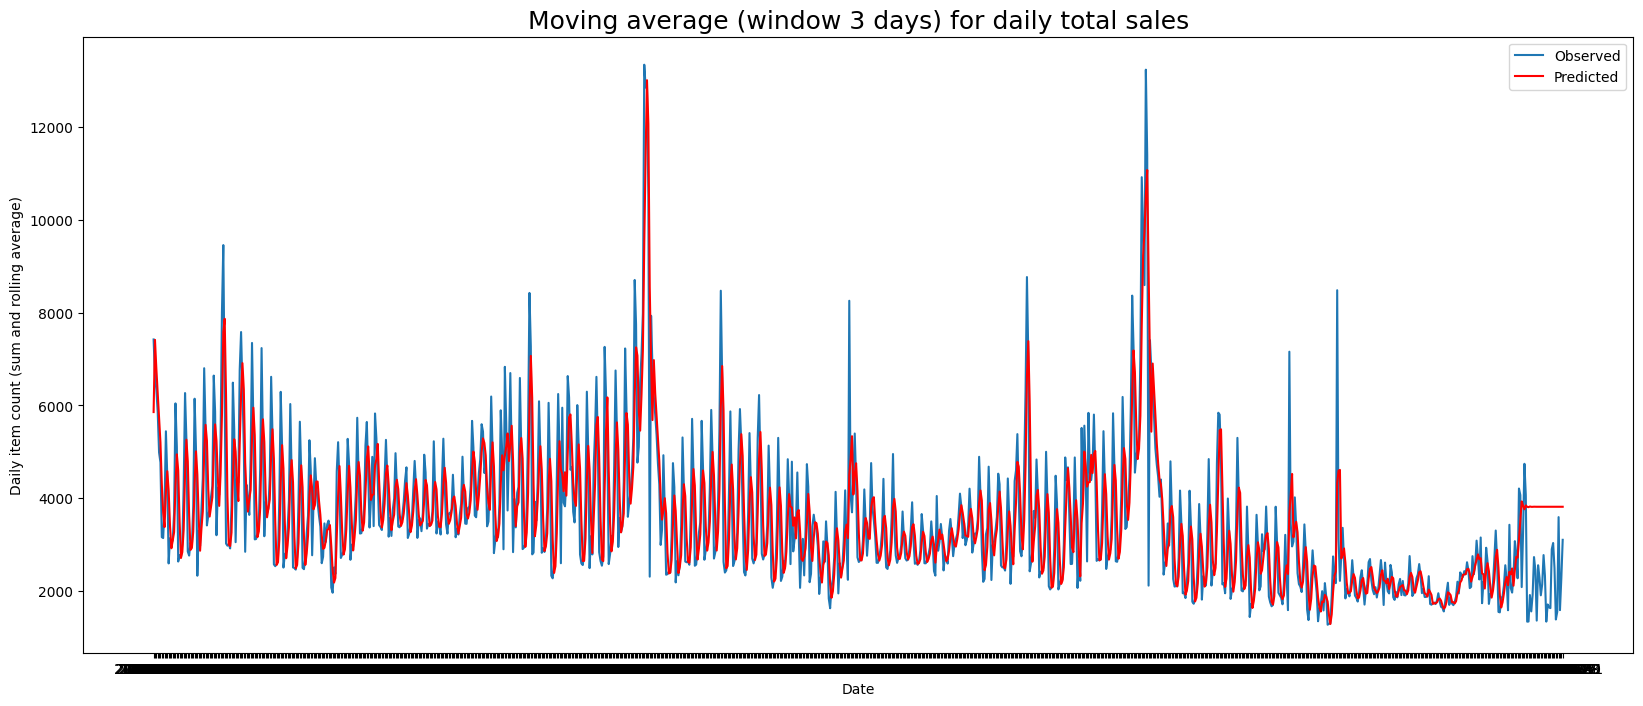

In [27]:

plt.rcParams["figure.figsize"] = (20,8)

plt.plot(df_daily_train.item_cnt_day[2:])
plt.plot(df_daily_train.rolling_av3[2:], color='red')
plt.title("Moving average (window 3 days) for daily total sales",
         fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Daily item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

In [28]:
mean_absolute_error(df_daily_train.item_cnt_day[-31:], df_daily_train.rolling_av3[-31:]).round(2)

1605.19

# 2B. Pandas moving average - daily - 3 day (Grouped by Month)

In [29]:
# Grouping the results by month
df_daily_train.head()
temp_monthly = df_daily_train.reset_index()

In [30]:
type(temp_monthly.date[0])
temp_monthly['date']= pd.to_datetime(temp_monthly['date'])

In [31]:
temp_monthly.index = temp_monthly['date']
temp_monthly = temp_monthly.groupby(pd.Grouper(freq='M'))[["item_cnt_day", "rolling_av3"]].sum()

In [32]:
#mean squared error (y_true, y_pred)
mean_squared_error(temp_monthly.item_cnt_day, temp_monthly.rolling_av3).round(2)

75117338.43

In [33]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(temp_monthly.item_cnt_day, temp_monthly.rolling_av3).round(2)

3303.46

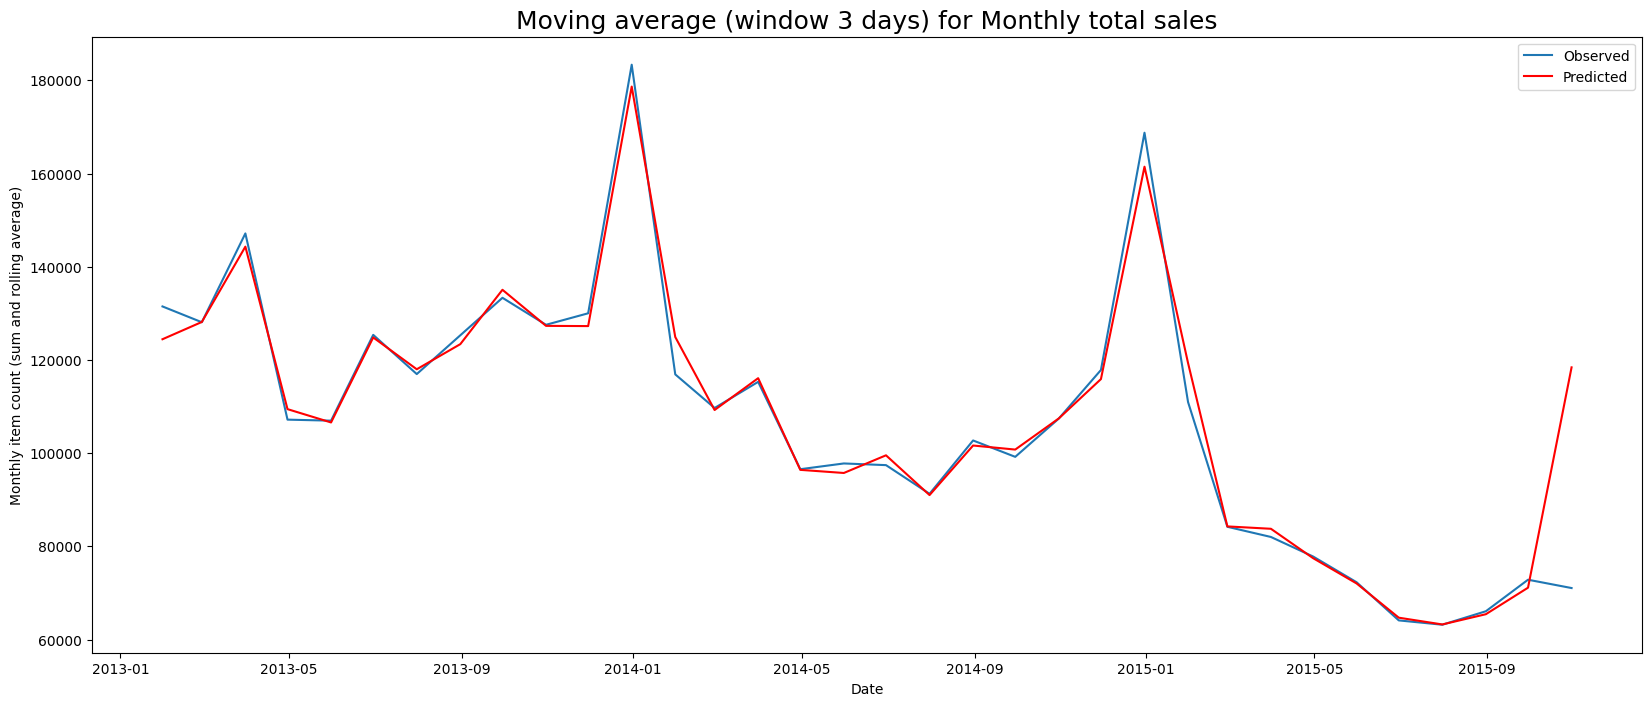

In [34]:
#Setting parameters for plot fig size
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(temp_monthly.item_cnt_day)
plt.plot(temp_monthly.rolling_av3, color='red')
plt.title("Moving average (window 3 days) for Monthly total sales",
         fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Monthly item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

In [35]:
mean_absolute_error(temp_monthly.item_cnt_day[-1:], temp_monthly.rolling_av3[-1:]).round(2)

47352.58

# 3. ARIMA - Monthly

### 1. Rearranging the dataframe

In [36]:
df_for_arima = df_daily.copy().reset_index()

In [37]:
df_for_arima.date = pd.to_datetime(df_for_arima.date)
df_for_arima = df_for_arima.resample(rule='M', on='date')['item_cnt_day'].sum()
df_for_arima.head()

date
2013-01-31    131478.0
2013-02-28    128090.0
2013-03-31    147142.0
2013-04-30    107190.0
2013-05-31    106970.0
Freq: M, Name: item_cnt_day, dtype: float64

### 2. EDA

Text(0, 0.5, 'Total item count of the month')

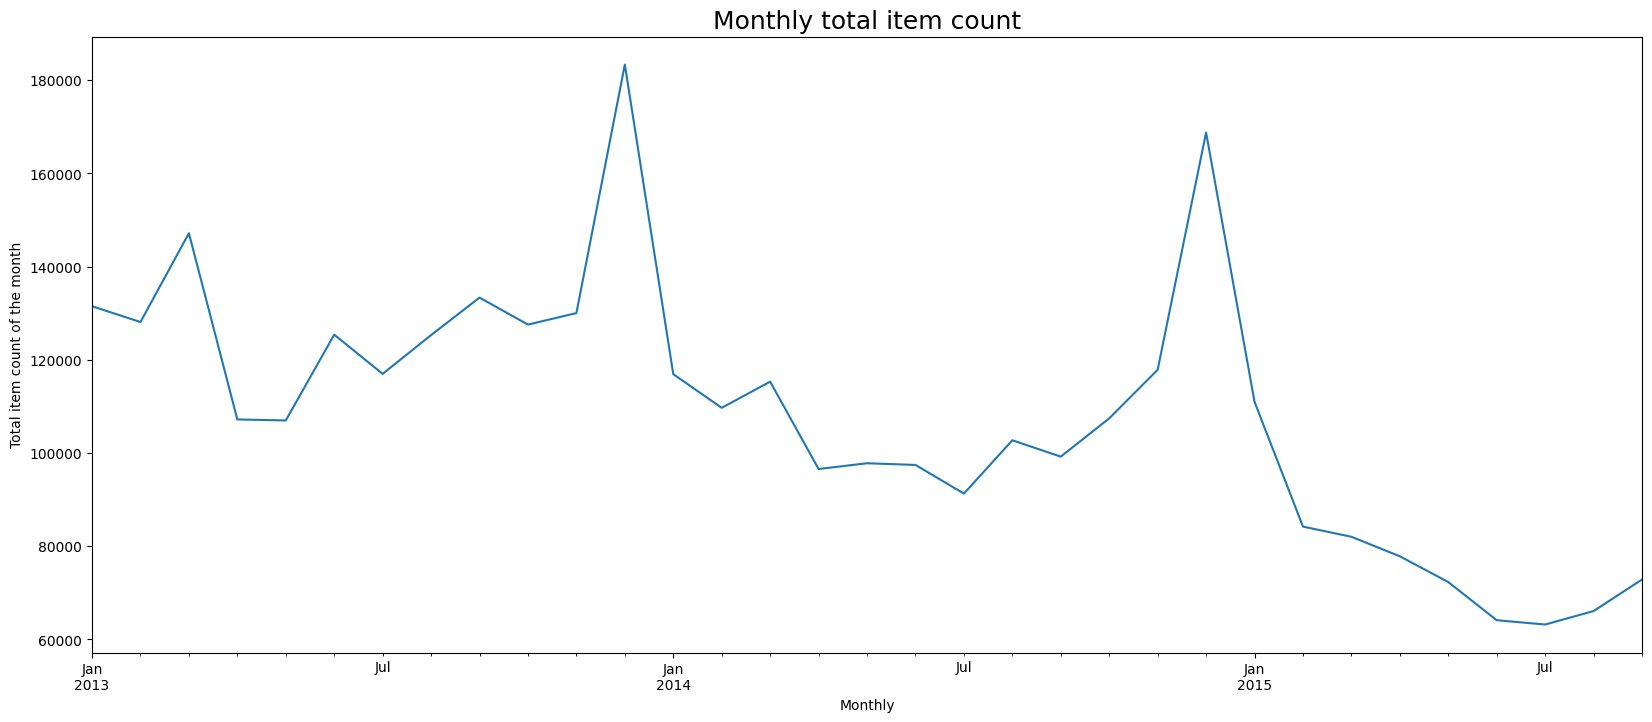

In [38]:
# Visualizing data as is
plt.rcParams["figure.figsize"] = (20,8)
df_for_arima.plot()
plt.title("Monthly total item count",
         fontsize = 18)
plt.xlabel("Monthly")
plt.ylabel("Total item count of the month")

### 3. Augmented Dickey-Fuller test

Theory:

Using a statistical test to check if the difference between two samples of Gaussian random variables is real or a statistical fluke. 

Null Hypothesis (H0): 

* If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. 
* It has some time dependent structure.

Alternate Hypothesis (H1): 

* The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. 
* It does not have time-dependent structure.

p-value
    
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [39]:

X = df_for_arima.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.431387
p-value: 0.133073
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618


* **p-value is > 0.05**, the data fails to reject the null hypothesis.
    
* The data has a unit root and is **non-stationary**


### 4. Autocorrelation - statsmodels

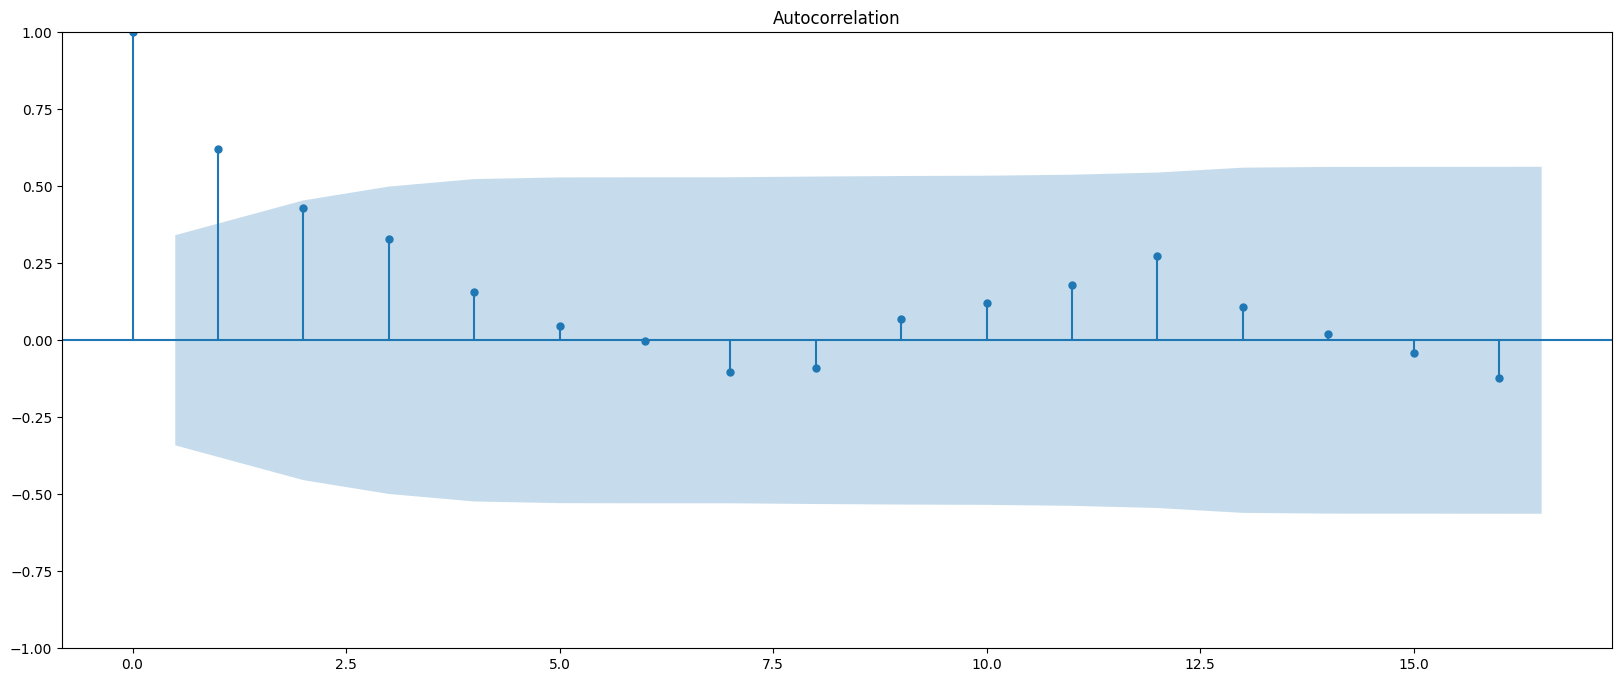

In [40]:
plot_acf(df_for_arima)
plt.show()

### 5. Seasonal decompose

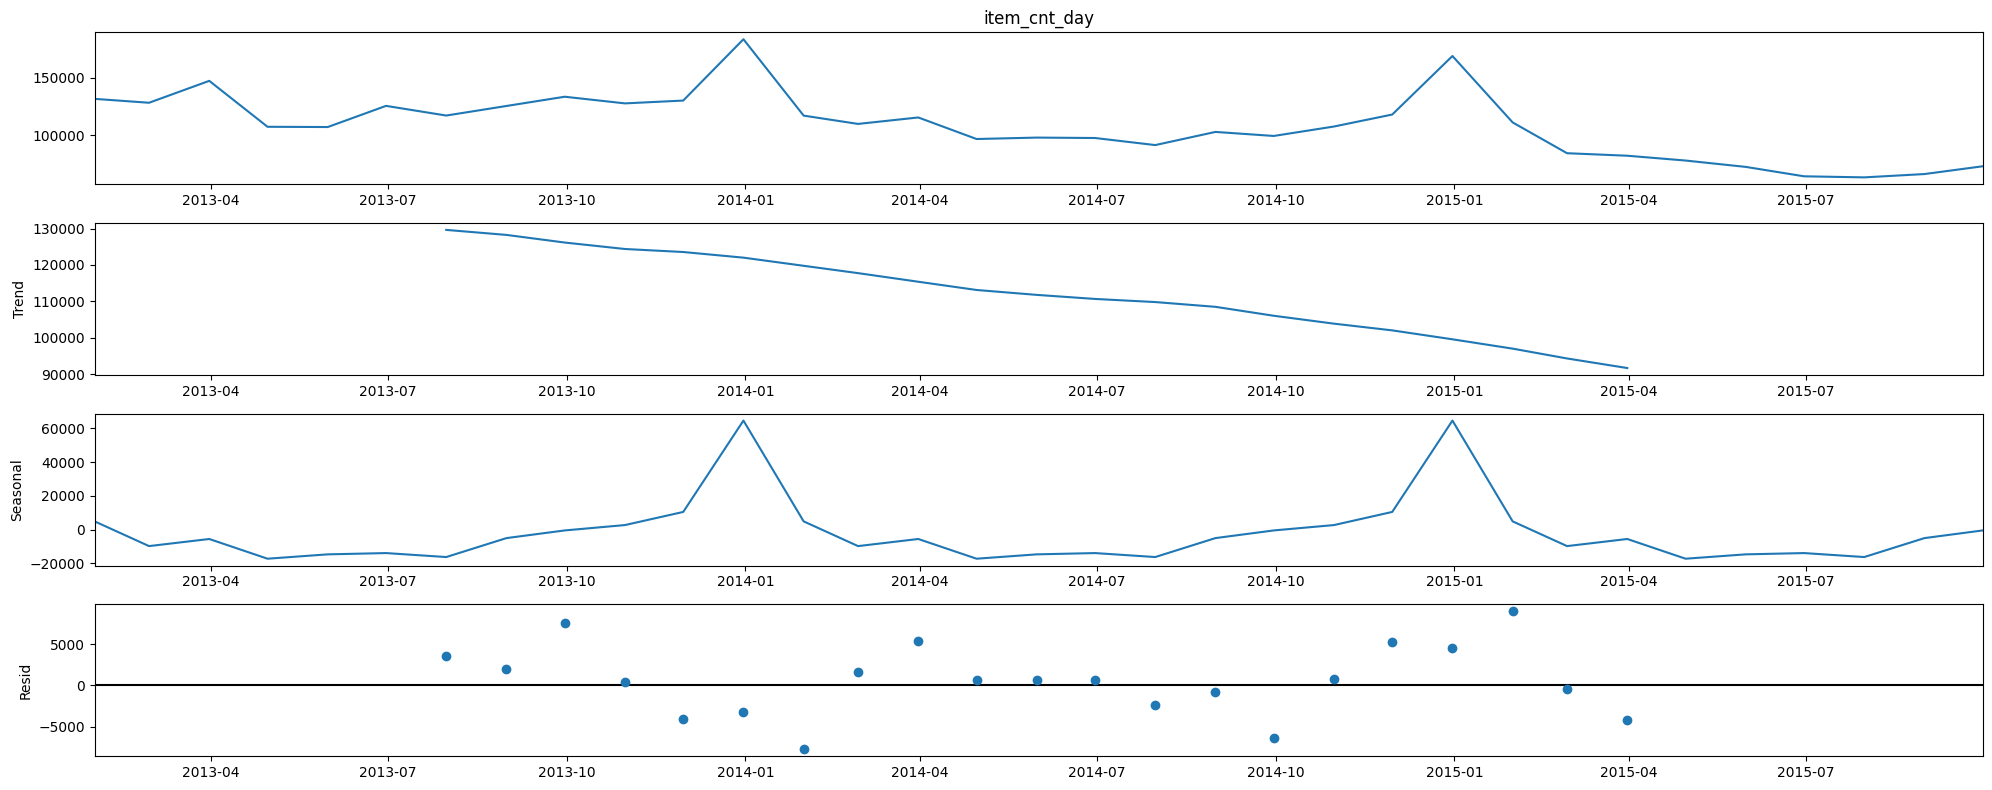

In [41]:
# Additive seasonal decompose
seasonal_decompose(df_for_arima, model='additive').plot()
plt.show()

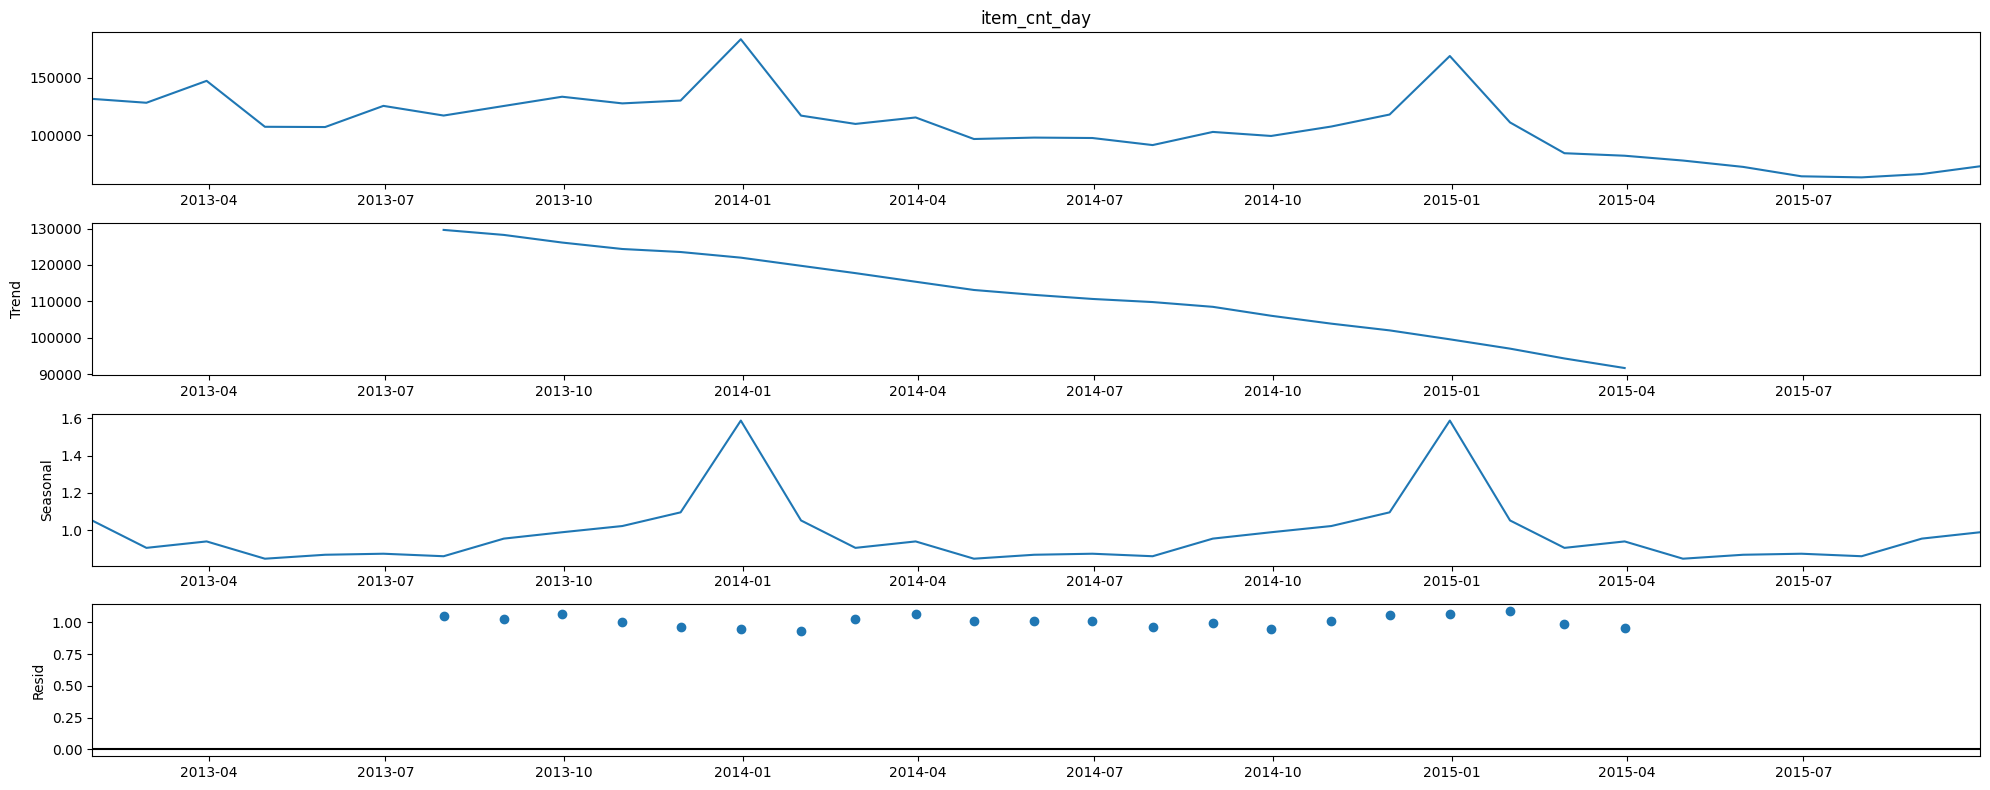

In [42]:
# Multiplicative seasonal decompose
seasonal_decompose(df_for_arima, model='multiplicative').plot()
plt.show()

In [43]:
# There is a clear downward trend 
# There is also clear seasonality (The two peaks at 2014-01 and 2015-01)
# The volatility of the residual is reduced considerably in the multiplicative model compared to the additive model.
# Probably the multiplicative model is the better bet

# 4. SARIMA - Monthly

## 1. Figuring out the SARIMA settings with pmdarima/autoarima

In [44]:
#!pip install pmdarima

In [45]:
data = df_for_arima.copy()
data.head()

date
2013-01-31    131478.0
2013-02-28    128090.0
2013-03-31    147142.0
2013-04-30    107190.0
2013-05-31    106970.0
Freq: M, Name: item_cnt_day, dtype: float64

In [46]:
data.tail()

date
2015-05-31    72295.0
2015-06-30    64114.0
2015-07-31    63187.0
2015-08-31    66079.0
2015-09-30    72843.0
Freq: M, Name: item_cnt_day, dtype: float64

In [47]:
stepwise_fit = pm.auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=435.595, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=431.327, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=433.660, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=433.592, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=432.033, Time=0.10 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=431.582, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=433.314, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=433.562, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=435.633, Time=0.03 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=433.226, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.611 seconds


## 2. Defining, fitting the model and forecasting

In [48]:
# Defining the model
model = SARIMAX(data, order=(0,1,0), seasonal_order=(0,1,0, 12))
#fit model
results=model.fit(method='cg')
#https://stackoverflow.com/questions/46146537/error-in-threading-sarimax-model
print(results.summary())

Optimization terminated successfully.
         Current function value: 22.642213
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 79
                                     SARIMAX Results                                      
Dep. Variable:                       item_cnt_day   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -309.585
Date:                            Wed, 21 Jun 2023   AIC                            621.169
Time:                                    02:06:56   BIC                            622.165
Sample:                                01-31-2013   HQIC                           621.364
                                     - 09-30-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [49]:
# one step forecast
yhat = results.forecast(steps=1)

In [50]:
yhat

2015-10-31    81057.0
Freq: M, dtype: float64

In [51]:
predicted = results.predict(start=0, end=len(data))

In [52]:
predicted.tail()

2015-06-30    71935.0
2015-07-31    57964.0
2015-08-31    74629.0
2015-09-30    62566.0
2015-10-31    81057.0
Freq: M, Name: predicted_mean, dtype: float64

## 3. Creating a dataframe to measure against test data

In [53]:
df_for_sarima_monthly = pd.DataFrame(data.copy())
df_for_sarima_monthly.tail()

,item_cnt_day
date,
2015-05-31,72295.0
2015-06-30,64114.0
2015-07-31,63187.0
2015-08-31,66079.0
2015-09-30,72843.0


In [54]:
index_val = yhat.index[0]
index_val

Timestamp('2015-10-31 00:00:00')

In [55]:
df_for_sarima_monthly.at[ index_val, 'item_cnt_day'] = df_monthly_test.item_cnt_day[33]
df_for_sarima_monthly.tail()

,item_cnt_day
date,
2015-06-30,64114.0
2015-07-31,63187.0
2015-08-31,66079.0
2015-09-30,72843.0
2015-10-31,71056.0


In [56]:
df_for_sarima_monthly["Predicted"] = predicted
df_for_sarima_monthly.tail()

,item_cnt_day,Predicted
date,,
2015-06-30,64114.0,71935.0
2015-07-31,63187.0,57964.0
2015-08-31,66079.0,74629.0
2015-09-30,72843.0,62566.0
2015-10-31,71056.0,81057.0


In [57]:
df_for_sarima_monthly.head()

,item_cnt_day,Predicted
date,,
2013-01-31,131478.0,0.0
2013-02-28,128090.0,131478.0
2013-03-31,147142.0,128090.0
2013-04-30,107190.0,147142.0
2013-05-31,106970.0,107190.0


In [58]:
#mean squared error (y_true, y_pred)
mean_squared_error(df_for_sarima_monthly.item_cnt_day[1:], df_for_sarima_monthly.Predicted[1:]).round(2)

1428109073.12

In [59]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(df_for_sarima_monthly.item_cnt_day[1:], df_for_sarima_monthly.Predicted[1:]).round(2)


17107.39

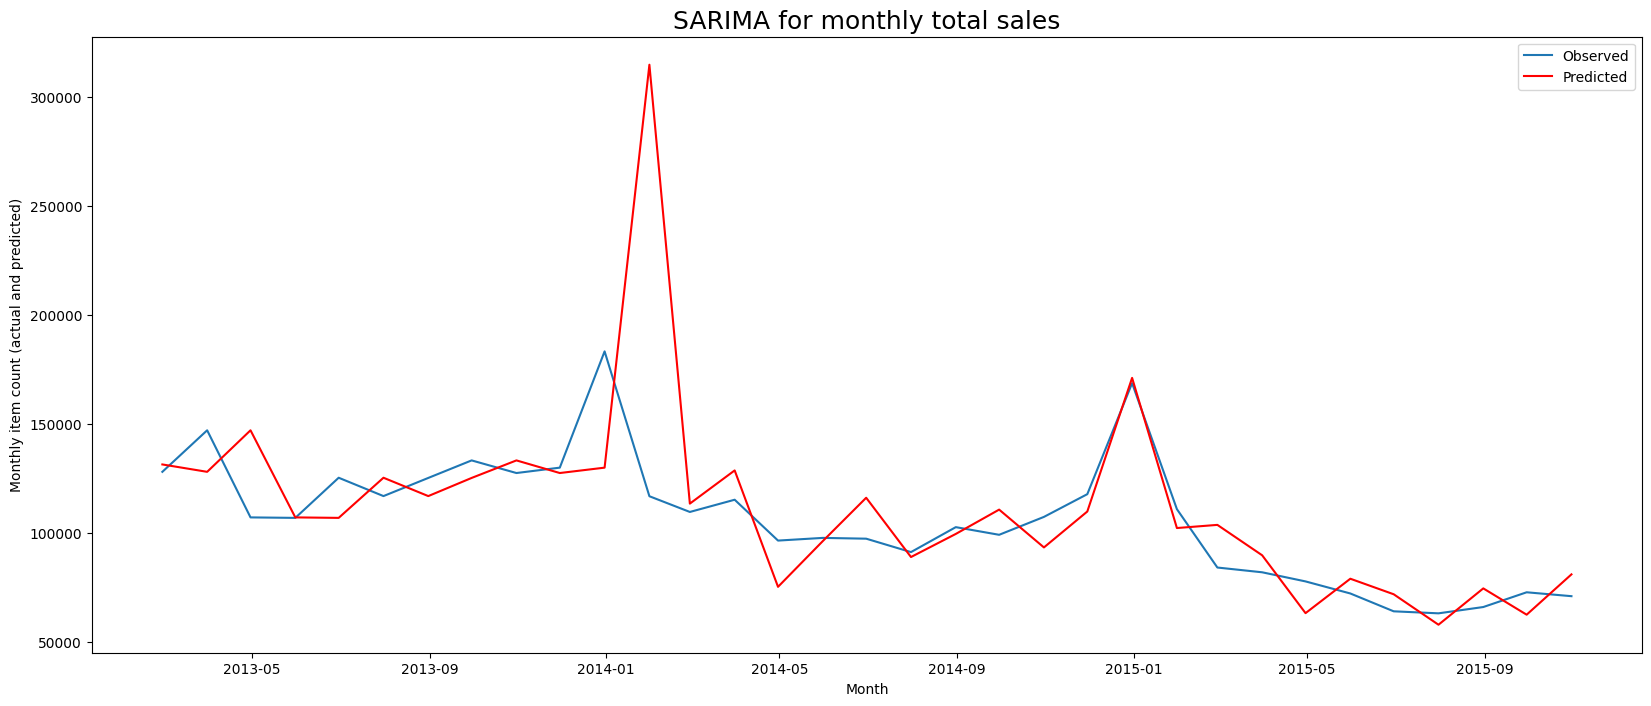

In [60]:
# Plotting Predicted vs Original
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(df_for_sarima_monthly.item_cnt_day[1:])
plt.plot(df_for_sarima_monthly.Predicted[1:], color='red')
plt.title("SARIMA for monthly total sales",
         fontsize = 18)
plt.xlabel("Month")
plt.ylabel("Monthly item count (actual and predicted)")
plt.legend(["Observed", "Predicted"])
plt.show()

# 5. ARIMA - Daily

In [61]:
df_for_arima_daily = df_daily.copy().reset_index()
df_for_arima_daily.date = pd.to_datetime(df_for_arima_daily.date)
df_for_arima_daily = df_for_arima_daily.resample(rule='D', on='date')['item_cnt_day'].sum()
df_for_arima_daily.tail()

date
2015-09-26    3075.0
2015-09-27    2818.0
2015-09-28    2275.0
2015-09-29    4209.0
2015-09-30    4068.0
Freq: D, Name: item_cnt_day, dtype: float64

Text(0, 0.5, 'Total item count of the day')

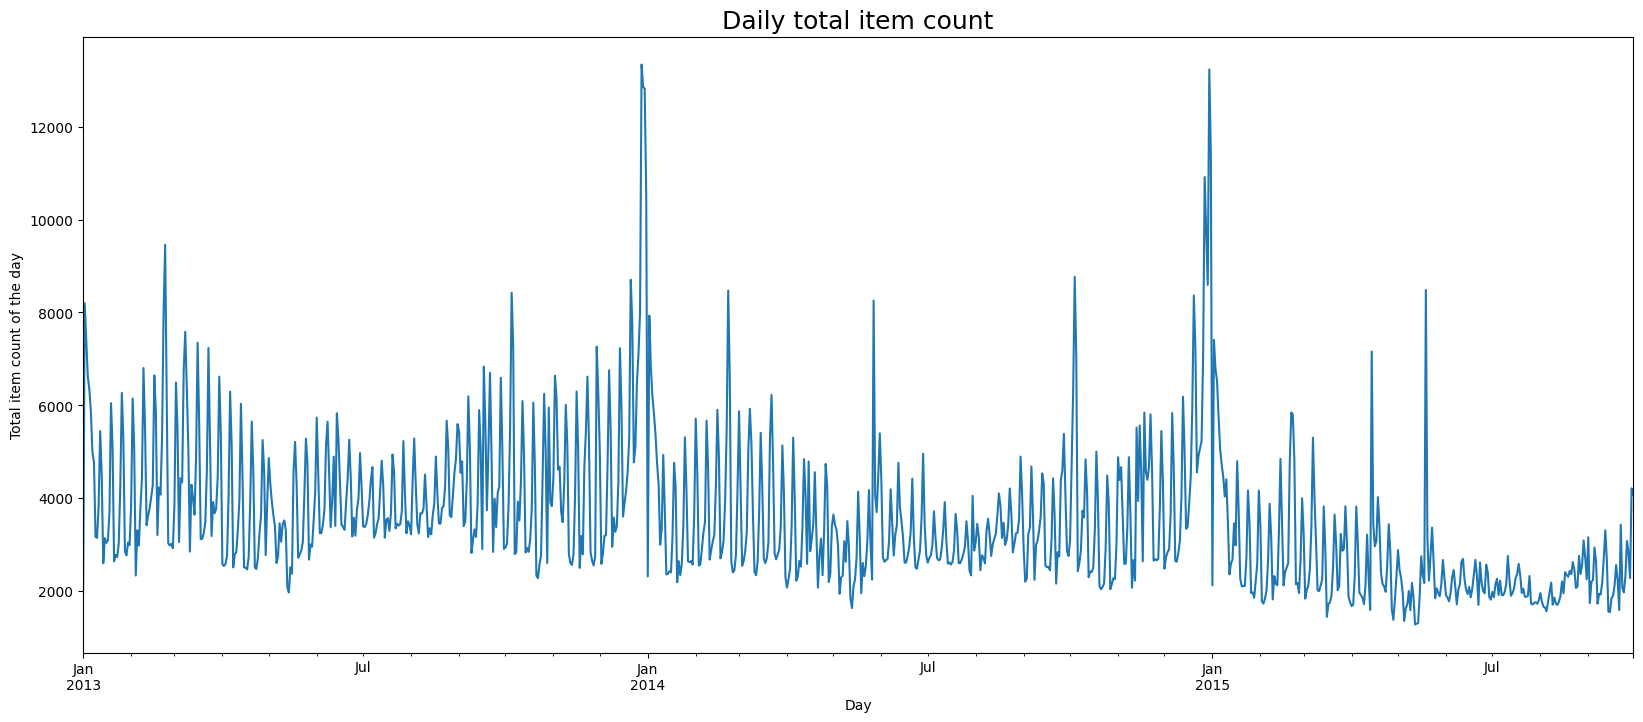

In [62]:
# Plotting data as is
plt.rcParams["figure.figsize"] = (20,8)
df_for_arima_daily.plot()
plt.title("Daily total item count",
         fontsize = 18)
plt.xlabel("Day")
plt.ylabel("Total item count of the day")

## 1. Augmented Dickey-Fuller test

In [63]:
# Augmented Dickey-Fuller test
X = df_for_arima_daily.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.173400
p-value: 0.000731
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


**p-value is < 0.05, the data rejects the null hypothesis.**

**The data does not have a unit root and is stationary**

## 2. Autocorrelation

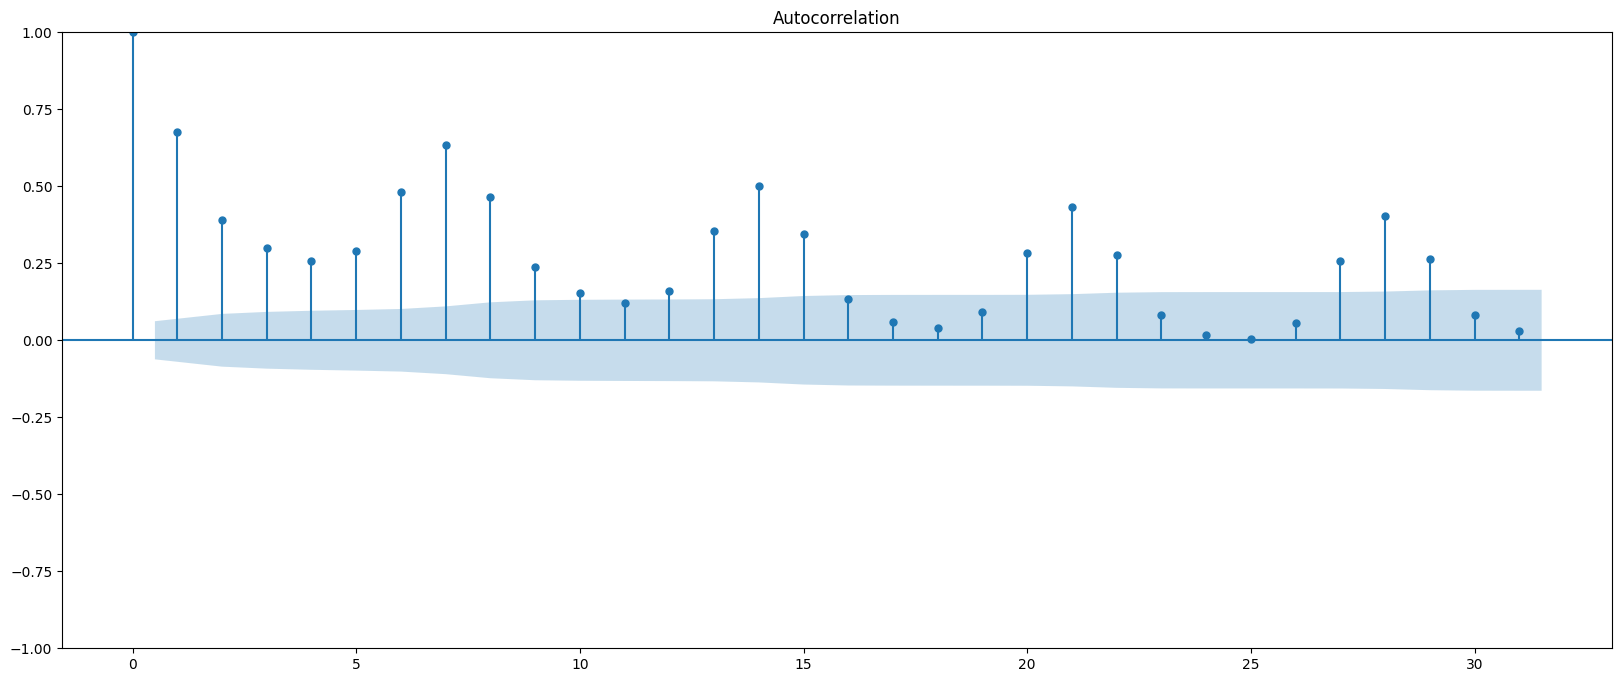

In [64]:
# Plot autocorrelation
plt.rcParams["figure.figsize"] = (20,8)
plot_acf(df_for_arima_daily)
plt.show()

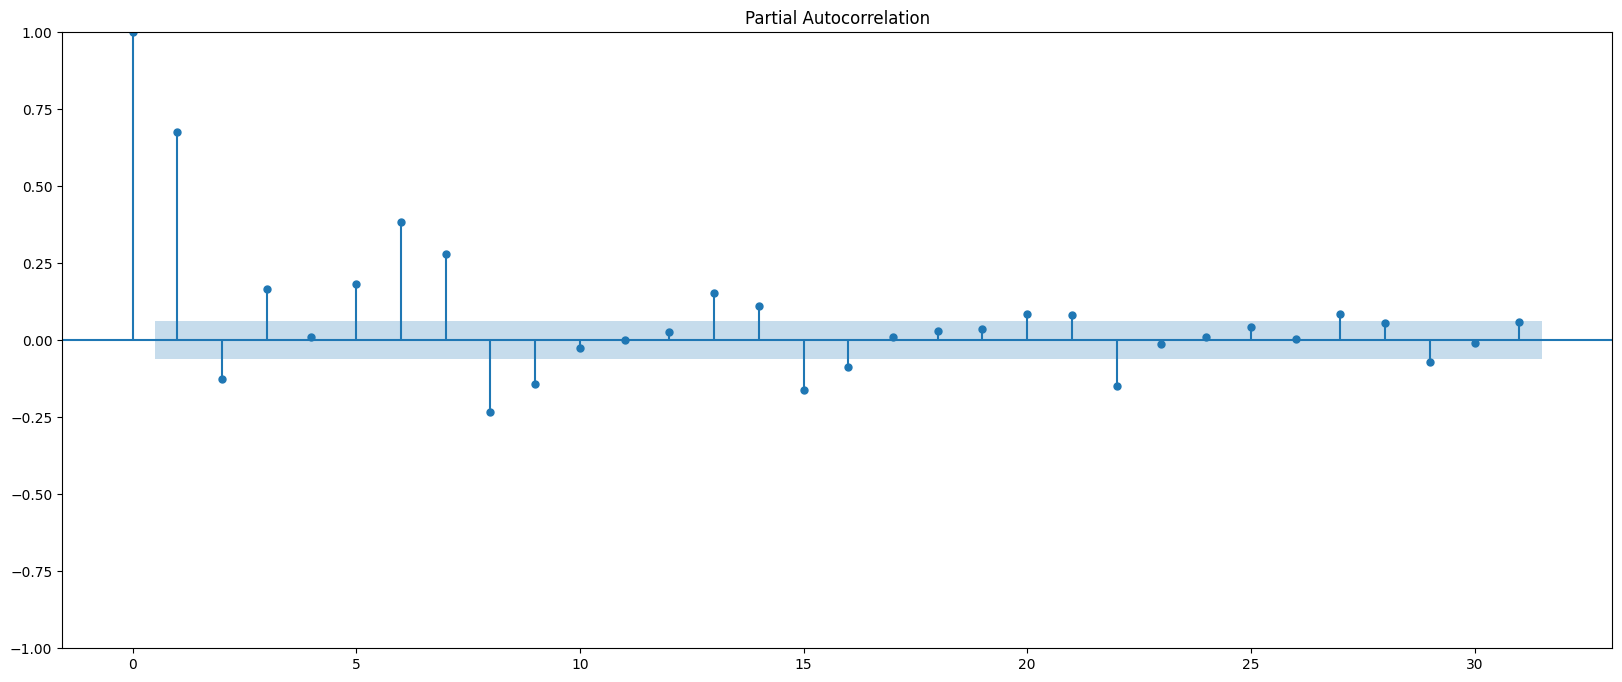

In [65]:
# Plot autocorrelation
plt.rcParams["figure.figsize"] = (20,8)
plot_pacf(df_for_arima_daily, method='ywm')
plt.show()

## 3. Seasonal decompose

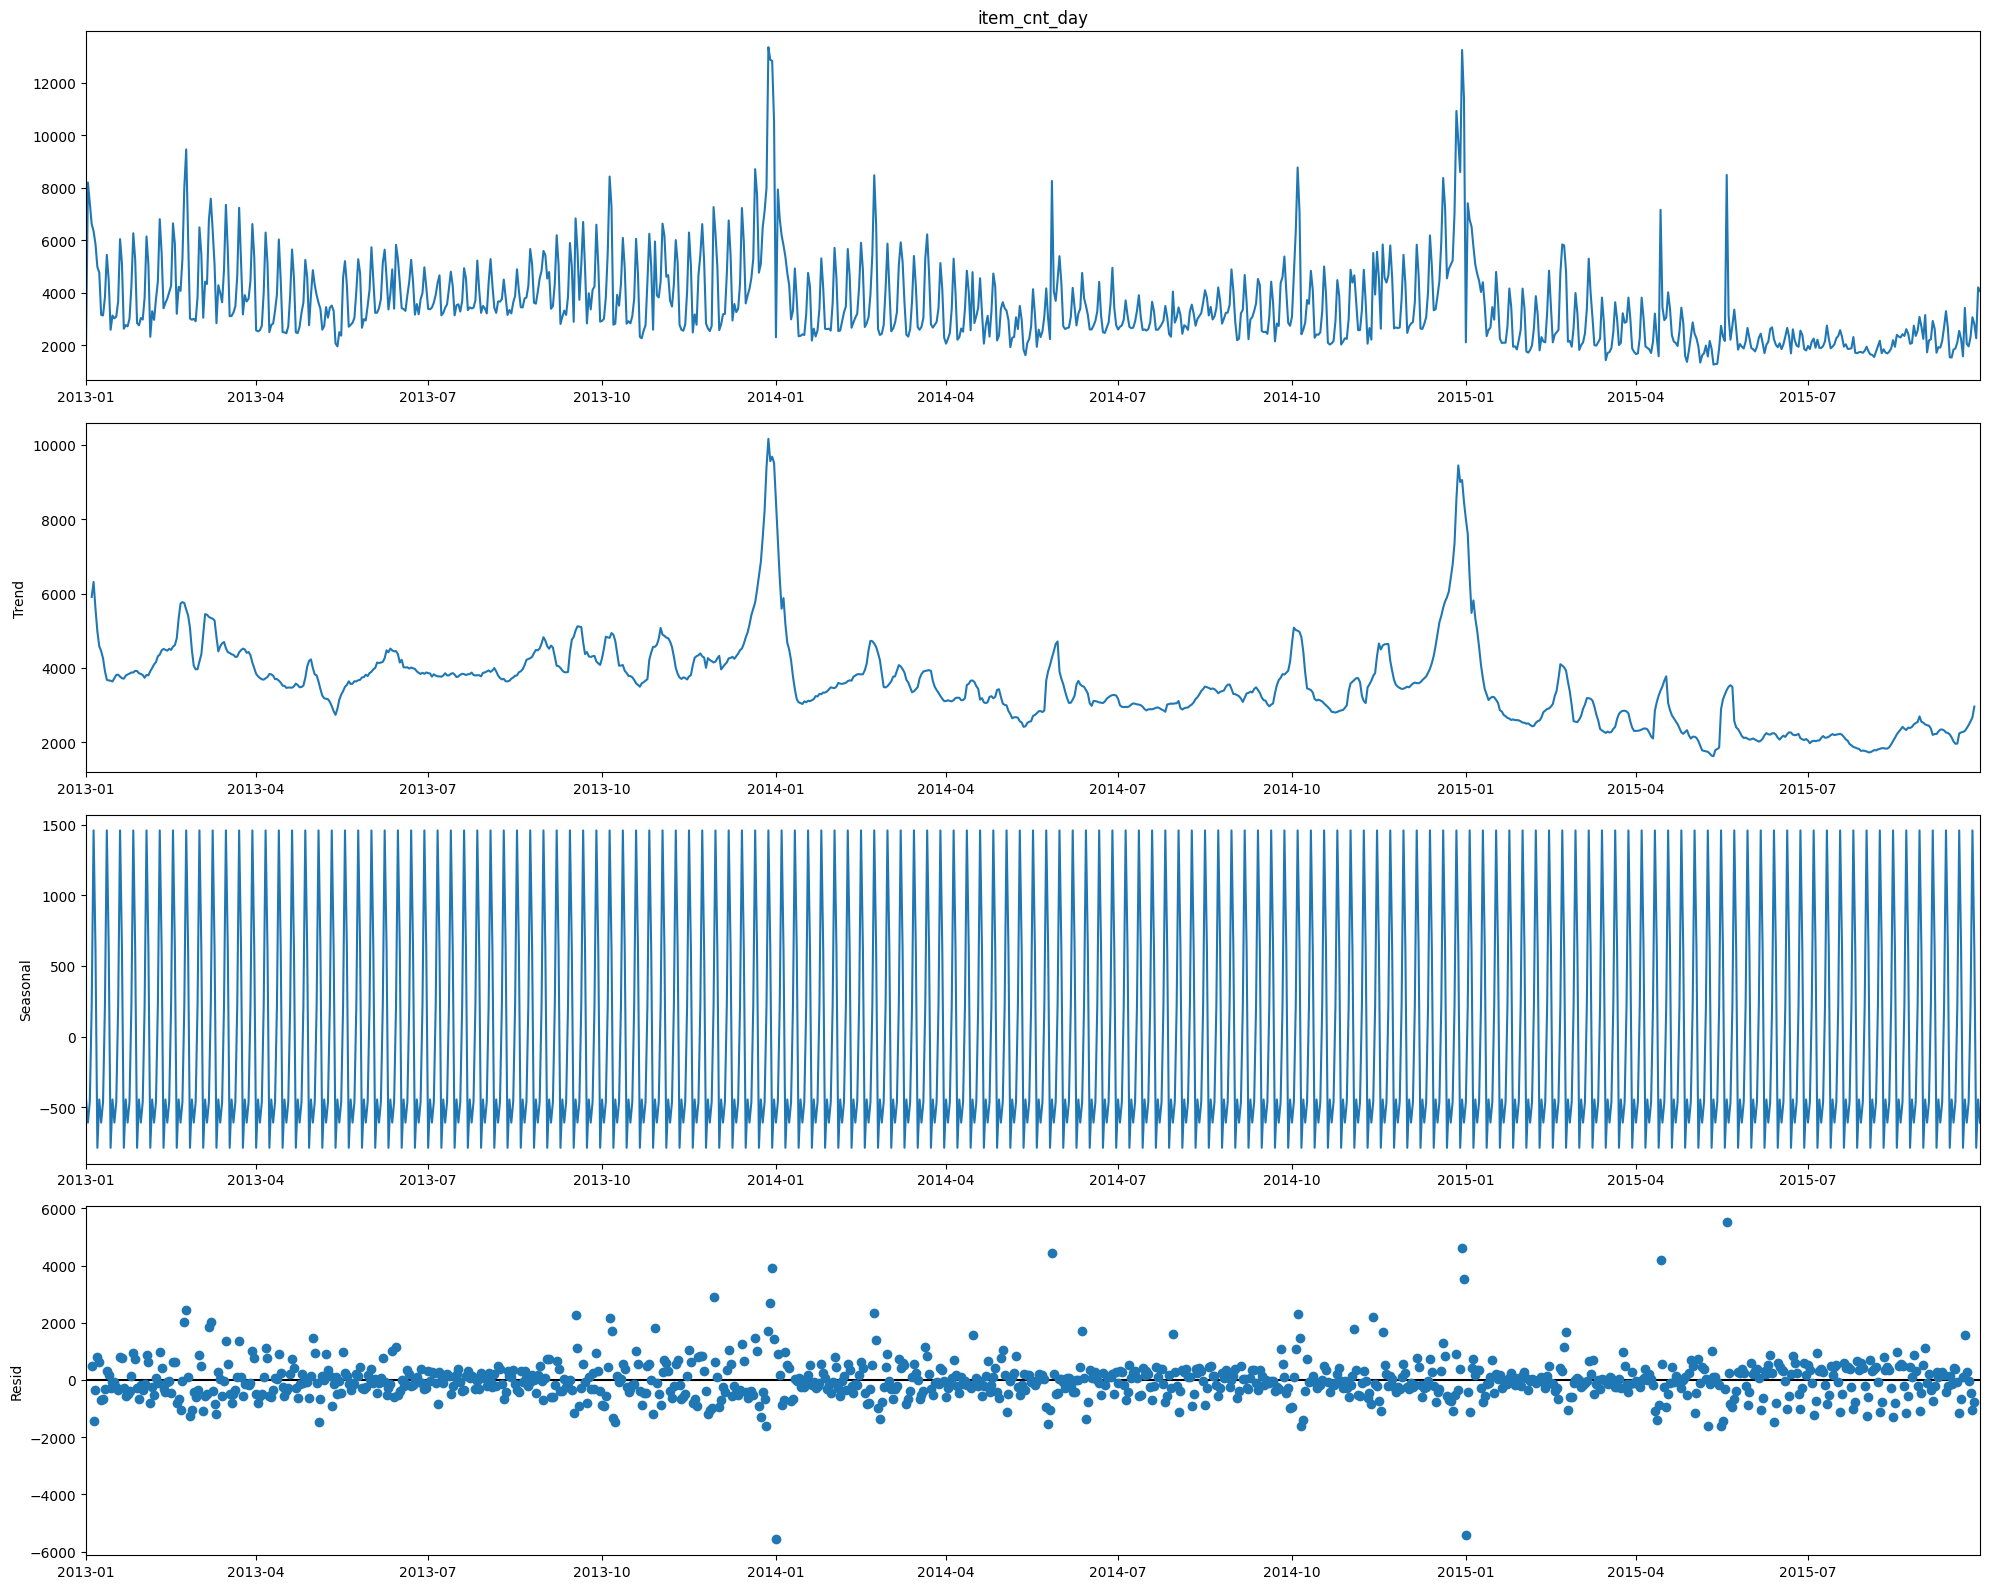

In [66]:
# Additive seasonal decompose
plt.rcParams["figure.figsize"] = (20,16)
seasonal_decompose(df_for_arima_daily, model='additive').plot()
plt.show()

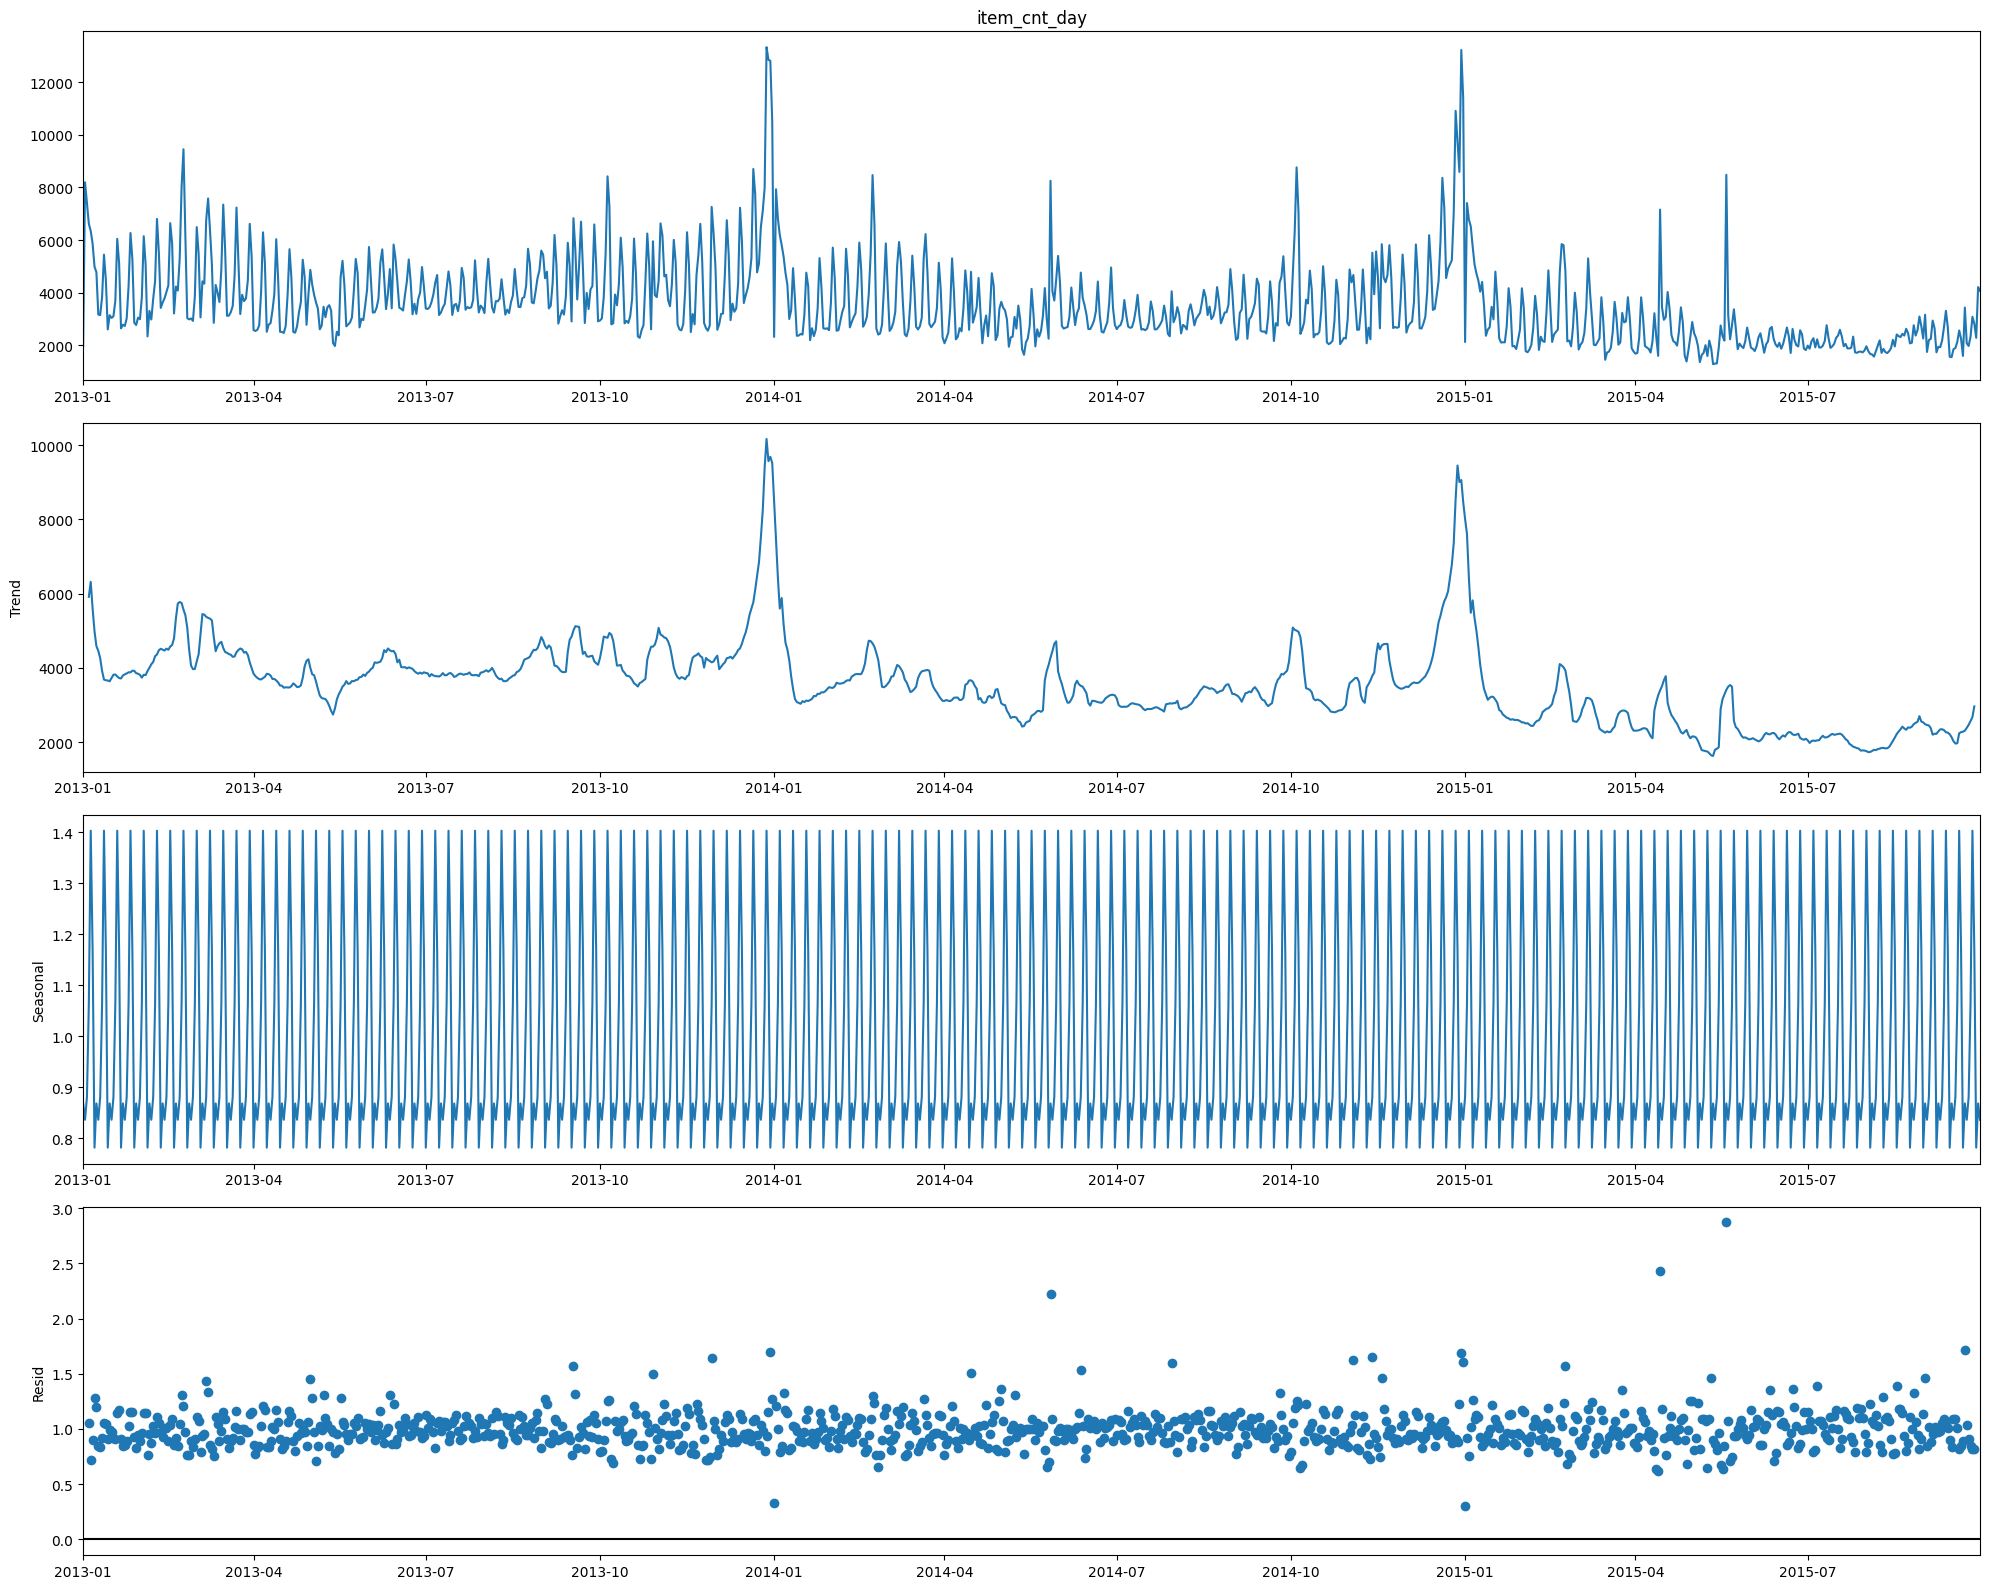

In [67]:
# Multiplicative seasonal decompose

seasonal_decompose(df_for_arima_daily, model='multiplicative').plot()
plt.show()

In [68]:
# There is a slight downward trend
# There is clear seasonality
# Residual improved a lot when changed from additive model to multiplicative. 

# 6. SARIMA - Daily

In [69]:
data = df_for_arima_daily.copy()

In [70]:
stepwise_fit = pm.auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print("Complete")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=17036.308, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=16727.609, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=16410.642, Time=0.68 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=16933.486, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=16410.124, Time=1.28 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=16684.894, Time=0.68 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=16412.036, Time=3.70 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=3.21 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=16410.181, Time=2.27 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=16585.281, Time=1.10 sec
 ARIMA(0,1,1)(2,1,2)[7]             : AIC=inf, Time=4.08 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.67 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=2.81 sec
 ARIMA(0,1,2)(1,1,1)[7]             : AIC=inf, Ti

In [71]:
# Best model:  ARIMA(0,1,1)(1,1,1)[7] AIC=16412.118
model = SARIMAX(data, order=(0,1,1), seasonal_order=(1,1,1, 7))

In [72]:
results=model.fit(method='cg')
print(results.summary())

         Current function value: 0.253555
         Iterations: 1
         Function evaluations: 45
         Gradient evaluations: 40
                                     SARIMAX Results                                     
Dep. Variable:                      item_cnt_day   No. Observations:                 1003
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -8488.350
Date:                           Wed, 21 Jun 2023   AIC                          16984.701
Time:                                   02:07:35   BIC                          17004.312
Sample:                               01-01-2013   HQIC                         16992.156
                                    - 09-30-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

/Users/shenya/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
# one step forecast
yhat = results.forecast(steps=31)
yhat

2015-10-01    2990.157983
2015-10-02    3345.171737
2015-10-03    4107.910971
2015-10-04    3838.986824
2015-10-05    3282.146072
2015-10-06    5169.494914
2015-10-07    5027.651752
2015-10-08    3983.492261
2015-10-09    4342.307493
2015-10-10    5109.535318
2015-10-11    4829.317656
2015-10-12    4259.368145
2015-10-13    6102.533063
2015-10-14    5959.891331
2015-10-15    4947.633003
2015-10-16    5310.048665
2015-10-17    6081.527693
2015-10-18    5790.613794
2015-10-19    5208.248806
2015-10-20    7009.566549
2015-10-21    6866.168481
2015-10-22    5884.124162
2015-10-23    6249.949839
2015-10-24    7025.455238
2015-10-25    6724.410792
2015-10-26    6130.286942
2015-10-27    7891.970675
2015-10-28    7747.856272
2015-10-29    6794.428039
2015-10-30    7163.483386
2015-10-31    7942.802213
Freq: D, Name: predicted_mean, dtype: float64

In [74]:
predicted = results.predict(start=0, end=len(data)+30)
predicted.tail()

2015-10-27    7891.970675
2015-10-28    7747.856272
2015-10-29    6794.428039
2015-10-30    7163.483386
2015-10-31    7942.802213
Freq: D, Name: predicted_mean, dtype: float64

In [75]:
series_for_sarima_daily = predicted.copy()

In [76]:
series_for_sarima_daily = pd.DataFrame(series_for_sarima_daily)

In [77]:
list = []
for i in data:
    list.append(i)
print(len(list))
for i in df_daily_test.item_cnt_day:
    list.append(i)
print(len(list))

1003
1034


In [78]:
series_for_sarima_daily["Original"] = list

In [79]:
series_for_sarima_daily.tail()

,predicted_mean,Original
2015-10-27,7891.970675,1551.0
2015-10-28,7747.856272,3593.0
2015-10-29,6794.428039,1589.0
2015-10-30,7163.483386,2274.0
2015-10-31,7942.802213,3104.0


In [80]:
#mean squared error (y_true, y_pred)
mean_squared_error(series_for_sarima_daily.Original[1:], 
                   series_for_sarima_daily.predicted_mean[1:]).round(2)


1910370.29

In [81]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(series_for_sarima_daily.Original[1:], 
                   series_for_sarima_daily.predicted_mean[1:]).round(2)


775.0

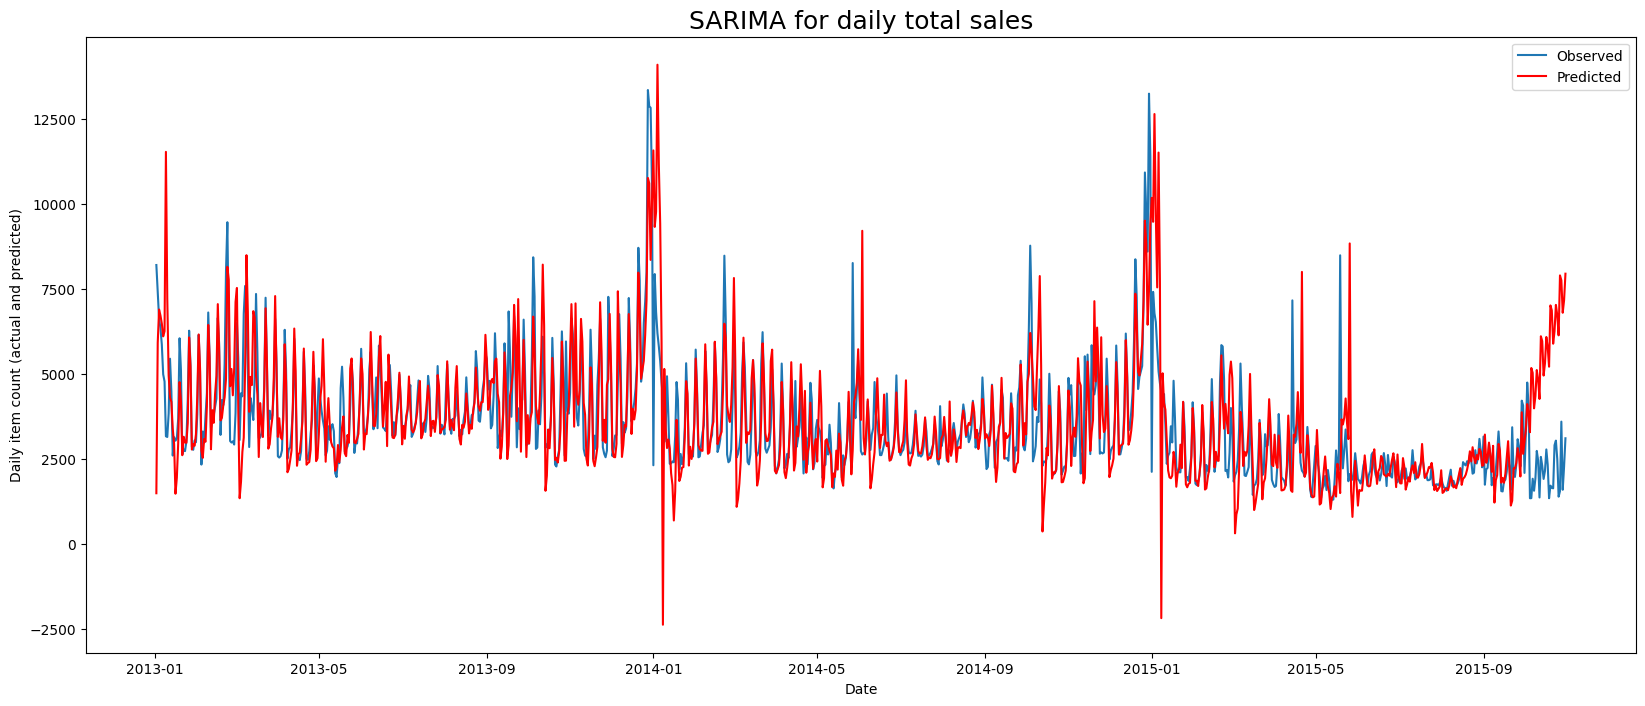

In [82]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(series_for_sarima_daily.Original[1:])
plt.plot(series_for_sarima_daily.predicted_mean[1:], color='red')
plt.title("SARIMA for daily total sales",
         fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Daily item count (actual and predicted)")
plt.legend(["Observed", "Predicted"])
plt.show()